### Datasets 

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

https://www.kaggle.com/lirilkumaramal/heart-stroke

#### SMOTE
https://www.kaggle.com/bhuvanchennoju/data-storytelling-auc-focus-on-strokes 

## 1. Explore Data 

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

import time as timer

import warnings
warnings.filterwarnings("ignore")

In [115]:
# heart_stroke_path = '/content/drive/MyDrive/Haasi/College/Grad SJSU/Fall 2021/CMPE 266 - Big Data Engineering/Heart Stroke Project/train_strokes.csv'
# healthcare_path = '/content/drive/MyDrive/Haasi/College/Grad SJSU/Fall 2021/CMPE 266 - Big Data Engineering/Heart Stroke Project/healthcare-dataset-stroke-data.csv'

In [116]:
cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
        'bmi', 'smoking_status']

In [117]:
df_1 = pd.read_csv('train_strokes.csv')

In [118]:
df_2 = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [119]:
df = pd.concat([df_1, df_2])

In [120]:
df.shape

(48510, 12)

In [121]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(44944, 12)

In [122]:
#df = pd.read_csv(heart_stroke_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44944 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 44944 non-null  int64  
 1   gender             44944 non-null  object 
 2   age                44944 non-null  float64
 3   hypertension       44944 non-null  int64  
 4   heart_disease      44944 non-null  int64  
 5   ever_married       44944 non-null  object 
 6   work_type          44944 non-null  object 
 7   Residence_type     44944 non-null  object 
 8   avg_glucose_level  44944 non-null  float64
 9   bmi                43421 non-null  float64
 10  smoking_status     31652 non-null  object 
 11  stroke             44944 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.5+ MB


In [124]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1523
smoking_status       13292
stroke                   0
dtype: int64

In [125]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,44944.000000,44944.000000,44944.000000,44944.000000,44944.000000,43421.000000,44944.000000
mean,36311.469807,41.806061,0.091514,0.046947,104.315062,28.504671,0.018467
std,21068.668025,22.716358,0.288342,0.211528,42.913483,7.801303,0.134636
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,17998.500000,23.000000,0.000000,0.000000,77.520000,23.100000,0.000000
50%,36331.000000,43.000000,0.000000,0.000000,91.560000,27.700000,0.000000
75%,54499.250000,60.000000,0.000000,0.000000,111.992500,32.800000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


## 2. Data Visualization

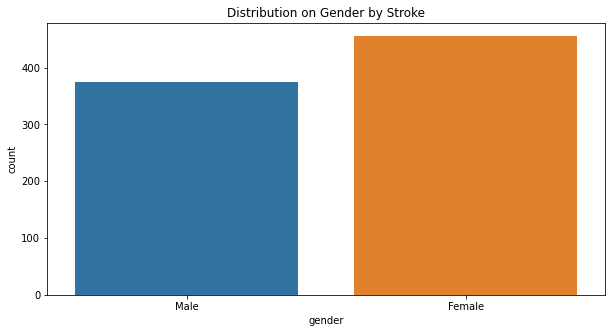

In [129]:
plt.figure(figsize=(10,5))
strok=df.loc[df['stroke']==1]
plt.title('Distribution on Gender by Stroke')
sns.countplot(data=strok,x='gender');

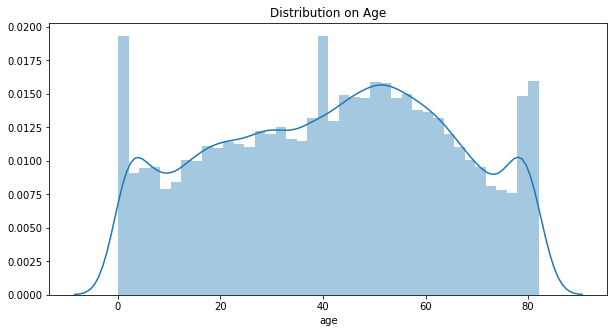

In [130]:
plt.figure(figsize=(10,5))
plt.title('Distribution on Age')
sns.distplot(df['age']);

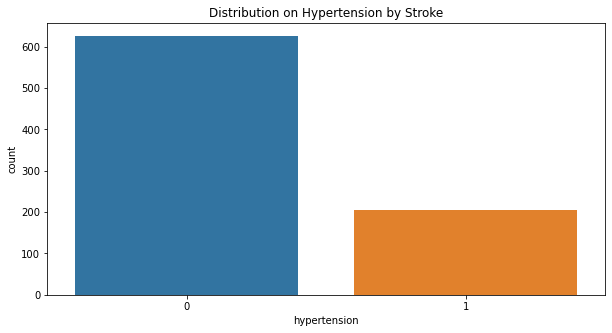

In [131]:
plt.figure(figsize=(10,5))
plt.title('Distribution on Hypertension by Stroke')
sns.countplot(data=strok,x='hypertension');

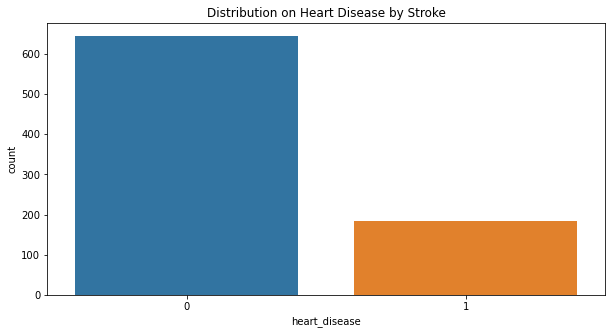

In [132]:
plt.figure(figsize=(10,5))
plt.title('Distribution on Heart Disease by Stroke')
sns.countplot(data=strok,x='heart_disease');

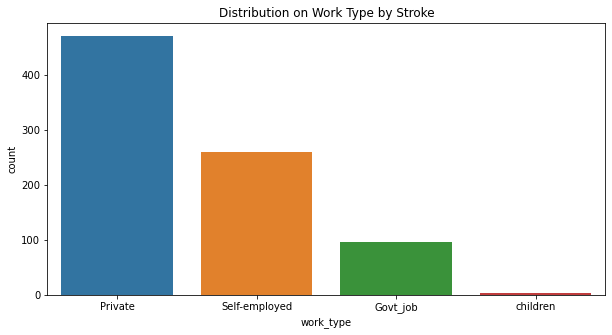

In [133]:
plt.figure(figsize=(10,5))
plt.title('Distribution on Work Type by Stroke')
sns.countplot(data=strok,x='work_type');

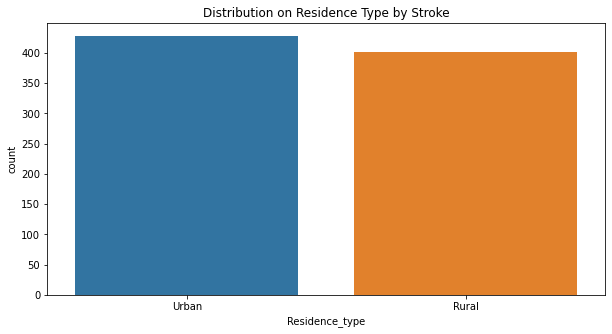

In [134]:
plt.figure(figsize=(10,5))
plt.title('Distribution on Residence Type by Stroke')
sns.countplot(data=strok,x='Residence_type');

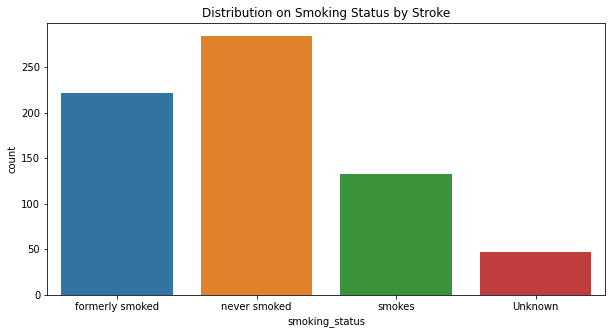

In [135]:
plt.figure(figsize=(10,5))
plt.title('Distribution on Smoking Status by Stroke')
sns.countplot(data=strok,x='smoking_status');

In [136]:
df['gender'].value_counts()

Female    26501
Male      18432
Other        11
Name: gender, dtype: int64

In [137]:
df['stroke'].value_counts()

0    44114
1      830
Name: stroke, dtype: int64

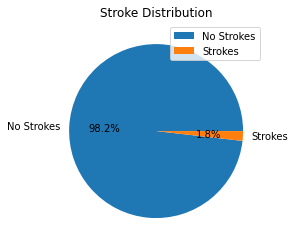

In [138]:
values = [42617, 783]
mylabels = ['No Strokes', 'Strokes']
plt.pie(values, labels=mylabels, autopct='%1.1f%%')
plt.title("Stroke Distribution")
plt.legend()
plt.show()

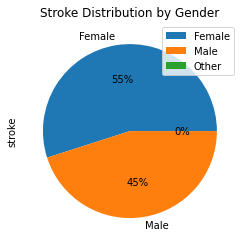

In [139]:
df.groupby(['gender']).sum().plot(kind='pie', y='stroke', autopct='%1.0f%%')
plt.title('Stroke Distribution by Gender')
plt.show()

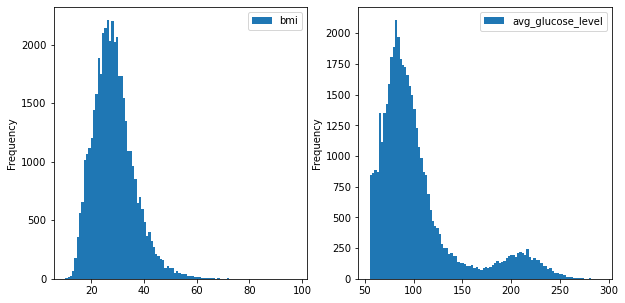

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
df.plot(kind="hist", y="bmi", bins=100, ax=axes[0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, ax=axes[1])
plt.show()

## 3. Data Preprocessing 

* Drop ID attribute
* Convert categorical attibutes to numerical 
* KNN Imputer to fill in missing values for BMI and smoking status
* Balance class: stroke using SMOTE technique

In [141]:
df = df.drop(columns='id',axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [142]:
# Convert age dtype from float to int
df['age'] = df['age'].astype(int)
df['age'].dtype

dtype('int32')

In [143]:
object_cols = df.select_dtypes(include=['object']).columns
print(object_cols)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [144]:
# Convert categorical values to numerical
labelencoder = LabelEncoder()
for col in object_cols:
    df[col] = df[col].astype(str)
    df[col] = labelencoder.fit_transform(df[col])
# df[object_cols] = df[object_cols].apply(labelencoder.fit_transform)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3,0,0,0,4,0,95.12,18.0,2,0
1,1,58,1,0,1,2,1,87.96,39.2,3,0
2,0,8,0,0,0,2,1,110.89,17.6,2,0
3,0,70,0,0,1,2,0,69.04,35.9,1,0
4,1,14,0,0,0,1,0,161.28,19.1,2,0


<AxesSubplot:>

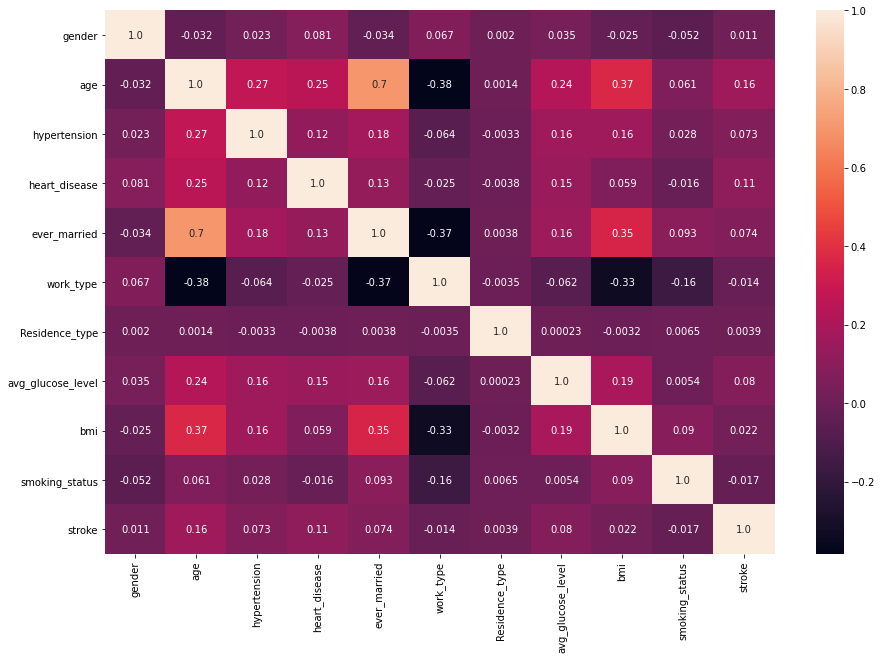

In [145]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2')

In [146]:
# Fill in missing values
final_df = df
# knn_col = ['bmi', 'smoking_status']
imputer = KNNImputer(n_neighbors=4, weights="uniform")
final_df = pd.DataFrame(imputer.fit_transform(final_df),columns = final_df.columns)
# imputer.fit_transform(final_df)
final_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [147]:
# Split data into train and test
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=255, test_size=0.2)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(35955, 10) (8989, 10) (35955,) (8989,)


In [148]:
# Balance classes
smote = SMOTE()
train_x, train_y = smote.fit_resample(train_x, train_y)
test_x, test_y = smote.fit_resample(test_x, test_y)

In [149]:
# df['stroke'].value_counts()
train_y.value_counts()

1.0    35306
0.0    35306
Name: stroke, dtype: int64

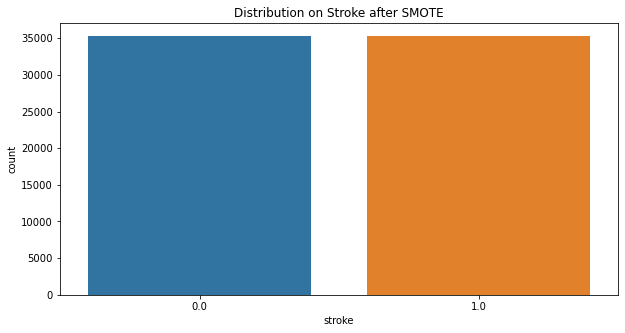

In [150]:
plt.figure(figsize=(10,5))
plt.title('Distribution on Stroke after SMOTE')
sns.countplot(x=train_y);

## 4. Modeling

In [151]:
ml_names = []
sens_all = []
spec_all = []
auc_all = []
prec_all = []
rec_all = []
f1_all = []

In [152]:
def calculate_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

In [153]:
def add_to_the_list(model_name, sens, spec, auc, prec, recall, f1):
    ml_names.append(model_name)
    sens_all.append(sens)
    spec_all.append(spec)
    auc_all.append(auc)
    prec_all.append(prec)
    rec_all.append(recall)
    f1_all.append(f1)

In [154]:
def calculate_metrics(y_test, y_pred, y_prob, model_name):
    print("Classification report for {}: \n{}".format(model_name, classification_report(y_test,y_pred)))
    print("Confusion matrix for {}: \n{}".format(model_name, confusion_matrix(y_test,y_pred)))
    print("Accuracy score for {}: {:.2f}".format(model_name, accuracy_score(y_test,y_pred)))
    # calculate precision, recall, and f1 scores
    prec_gnb = precision_score(y_test,y_pred)
    rec_gnb = recall_score(y_test,y_pred)
    f1_gnb = f1_score(y_test,y_pred)
    print("Precision score for {}: {:.2f}".format(model_name, prec_gnb))
    print("Recall score for {}: {:.2f}".format(model_name, rec_gnb))
    print("F1 score for {}: {:.2f}".format(model_name, f1_gnb))
    # calculate sensitivity, specificity, and auc
    sens_gnb,spec_gnb = calculate_sens_spec(y_test,y_pred)
    fpr, tpr, _ = roc_curve(y_test,  y_prob[:,1])
    auc_gnb = roc_auc_score(y_test, y_prob[:,1])
    print("Sensitivity score for {}: {:.2f}".format(model_name, sens_gnb))
    print("Specitivity score for {}: {:.2f}".format(model_name, spec_gnb))
    print("AUC score for {}: {:.2f}".format(model_name, auc_gnb))
    add_to_the_list(model_name, sens_gnb, spec_gnb, auc_gnb, prec_gnb, rec_gnb, f1_gnb)
    title = "Receiver Operating Characteristic ({})".format(model_name)
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
    ax.plot([0, 1], [0, 1], color='green', linestyle='--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc="lower right")
    plt.show()

### Logistic Regression

Classification report for Log Regrssion: 
              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79      8808
         1.0       0.77      0.86      0.81      8808

    accuracy                           0.80     17616
   macro avg       0.80      0.80      0.80     17616
weighted avg       0.80      0.80      0.80     17616

Confusion matrix for Log Regrssion: 
[[6548 2260]
 [1276 7532]]
Accuracy score for Log Regrssion: 0.80
Precision score for Log Regrssion: 0.77
Recall score for Log Regrssion: 0.86
F1 score for Log Regrssion: 0.81
Sensitivity score for Log Regrssion: 0.86
Specitivity score for Log Regrssion: 0.74
AUC score for Log Regrssion: 0.87


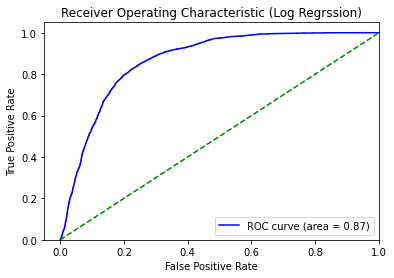

In [155]:
log_regress = LogisticRegression()
log_regress.fit(train_x, train_y)
y_pr = log_regress.predict(test_x)
y_prob = log_regress.predict_proba(test_x)
calculate_metrics(test_y, y_pr, y_prob, 'Log Regrssion')

### XGBoost

Classification report for XGBoost: 
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      8808
         1.0       1.00      0.97      0.98      8808

    accuracy                           0.98     17616
   macro avg       0.99      0.98      0.98     17616
weighted avg       0.99      0.98      0.98     17616

Confusion matrix for XGBoost: 
[[8806    2]
 [ 267 8541]]
Accuracy score for XGBoost: 0.98
Precision score for XGBoost: 1.00
Recall score for XGBoost: 0.97
F1 score for XGBoost: 0.98
Sensitivity score for XGBoost: 0.97
Specitivity score for XGBoost: 1.00
AUC score for XGBoost: 1.00


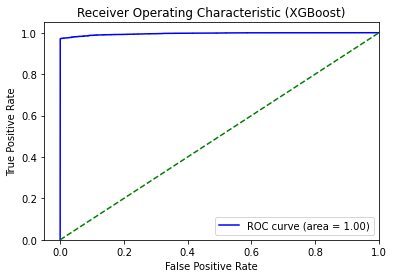

In [156]:
xgboost = XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')
xgboost.fit(train_x, train_y)
y_pr = xgboost.predict(test_x)
accuracy_score(test_y, y_pr)
y_prob = xgboost.predict_proba(test_x)
calculate_metrics(test_y, y_pr, y_prob, 'XGBoost')

### Random Forest

Classification report for RF: 
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      8808
         1.0       1.00      0.92      0.96      8808

    accuracy                           0.96     17616
   macro avg       0.96      0.96      0.96     17616
weighted avg       0.96      0.96      0.96     17616

Confusion matrix for RF: 
[[8798   10]
 [ 715 8093]]
Accuracy score for RF: 0.96
Precision score for RF: 1.00
Recall score for RF: 0.92
F1 score for RF: 0.96
Sensitivity score for RF: 0.92
Specitivity score for RF: 1.00
AUC score for RF: 0.99


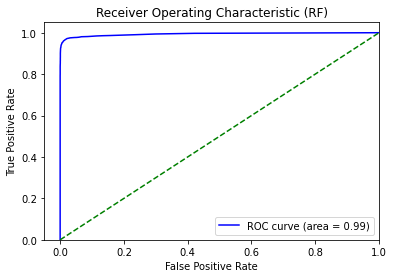

In [160]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(train_x, train_y)
rfc_y_pred = rfc.predict(test_x)
accuracy_score(test_y, rfc_y_pred)
y_prob = rfc.predict_proba(test_x)
calculate_metrics(test_y, rfc_y_pred, y_prob, 'RF')

### K-Neighbors Classifier

Classification report for KNN: 
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77      8808
         1.0       0.76      0.80      0.78      8808

    accuracy                           0.77     17616
   macro avg       0.77      0.77      0.77     17616
weighted avg       0.77      0.77      0.77     17616

Confusion matrix for KNN: 
[[6572 2236]
 [1795 7013]]
Accuracy score for KNN: 0.77
Precision score for KNN: 0.76
Recall score for KNN: 0.80
F1 score for KNN: 0.78
Sensitivity score for KNN: 0.80
Specitivity score for KNN: 0.75
AUC score for KNN: 0.84


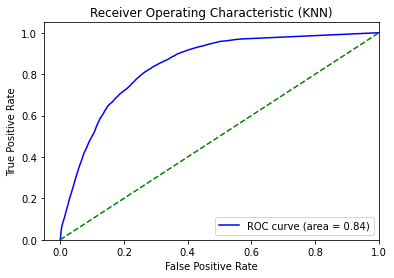

In [161]:
knc = KNeighborsClassifier(n_neighbors=75, metric='manhattan')
knc.fit(train_x, train_y)
knc_y_pred = knc.predict(test_x)
accuracy_score(test_y, knc_y_pred)
y_prob = knc.predict_proba(test_x)
calculate_metrics(test_y, knc_y_pred, y_prob, 'KNN')

### Artificial Neural Network

In [49]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=10, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [50]:
model = create_model()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                176       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
history=model.fit(train_x, train_y, validation_data=(test_x, test_y),epochs=50, batch_size=10)

Epoch 1/50
7062/7062 [==============================] - 11s 2ms/step - loss: 2.1668 - accuracy: 0.5000 - val_loss: 6.6078 - val_accuracy: 0.5000
Epoch 2/50
7062/7062 [==============================] - 11s 2ms/step - loss: 15.5953 - accuracy: 0.5000 - val_loss: 26.9429 - val_accuracy: 0.5000
Epoch 3/50
7062/7062 [==============================] - 11s 2ms/step - loss: 43.2226 - accuracy: 0.5000 - val_loss: 62.0364 - val_accuracy: 0.5000
Epoch 4/50
7062/7062 [==============================] - 10s 1ms/step - loss: 86.0714 - accuracy: 0.5000 - val_loss: 112.8257 - val_accuracy: 0.5000
Epoch 5/50
7062/7062 [==============================] - 10s 1ms/step - loss: 144.8971 - accuracy: 0.5000 - val_loss: 179.7750 - val_accuracy: 0.5000
Epoch 6/50
7062/7062 [==============================] - 10s 1ms/step - loss: 220.0392 - accuracy: 0.5000 - val_loss: 263.0986 - val_accuracy: 0.5000
Epoch 7/50
7062/7062 [==============================] - 10s 1ms/step - loss: 311.6972 - accuracy: 0.5000 - val_loss

## Performance Benchmark for all Models

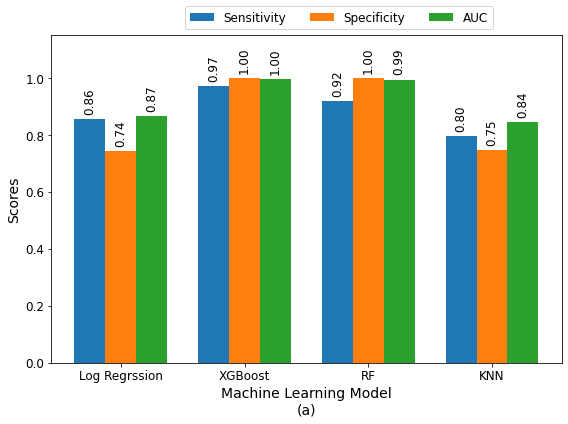

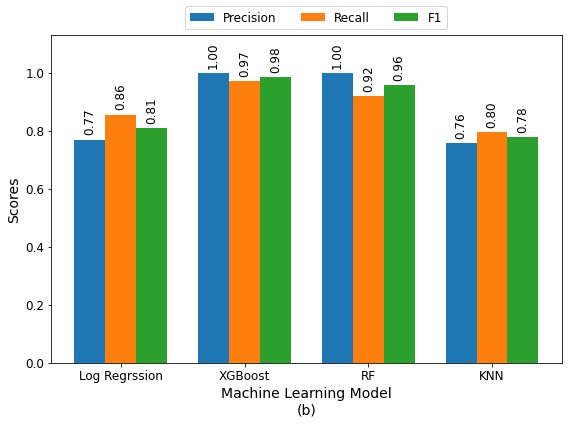

In [162]:
def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, sens_all, width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, auc_all, width, label='AUC')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.15])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(a)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_auc.pdf", bbox_inches='tight')
plt.show()

# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(b)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()